# Telecom Churn Case Study
---



**Manohar Simons & Budhaditya Saha**


## Business Objective: 
#### In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.
#### For many incumbent operators, retaining high profitable customers is the number one business goal.
#### To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.
#### In this project, we will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

### **Steps**
#### 1. Setup
#### 2. Data cleaning / Handling missing data
#### 3. Filter High Value customers
#### 4. Derive churn from 9th month data
#### 5. EDA
#### 6. Model building
* *Using PCA for high performance model*

> *Logistic Regression using PCA*

> *Random Forest using PCA*

* *Without PCA for interpretable model*

> *Logistic Regression*
#### 7. Model evaluation
#### 8. Recommendations using interpretable model


## 1. Setup

In [1]:
import pandas as pd

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("telecom_churn_data.csv")
data.shape

(99999, 226)

In [3]:
pd.set_option('display.max_columns', 250)
pd.set_option('display.max_rows', 250)
data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [4]:
data.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

In [5]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   mobile_number             int64  
 1   circle_id                 int64  
 2   loc_og_t2o_mou            float64
 3   std_og_t2o_mou            float64
 4   loc_ic_t2o_mou            float64
 5   last_date_of_month_6      object 
 6   last_date_of_month_7      object 
 7   last_date_of_month_8      object 
 8   last_date_of_month_9      object 
 9   arpu_6                    float64
 10  arpu_7                    float64
 11  arpu_8                    float64
 12  arpu_9                    float64
 13  onnet_mou_6               float64
 14  onnet_mou_7               float64
 15  onnet_mou_8               float64
 16  onnet_mou_9               float64
 17  offnet_mou_6              float64
 18  offnet_mou_7              float64
 19  offnet_mou_8              float64
 20  offnet_mou_9              f

### Understanding of the given dataset

The information available in the given dataset can be broadly classified into the following categories:
Dataset<br>
> Revenue<br>
> Voice usage (MoU)<br>
> Data usage (VOL)<br>
> Recharge<br>
> Prepaid service schemes<br>
> Age on network (days)
> Volume based cost (paid per usage)

>Revenue<br>
>> MoU<br>
>> 2G<br>
>> 3G<br>

> Voice<br>
>> Incoming<br>
>> Outgoing<br>
>>> Roaming<br>
>>> STD<br>
>>> ISD<br>
>>> Local<br>
>>> Special<br>
>>> Others<br>

> Data usage (Mb)<br>
>> 2g<br>
>> 3g<br>

> Recharge<br>
>> Voice<br>
>> Data<br>

>> Voice<br>
>>> Voice recharge count (monthly)<br>
>>> Total amount of recharge voice (monthly)<br>
>>> Maximum amount of recharge voice (monthly)<br>
>>> Date of last recharge (voice)<br>
>>> Amount of last recharge (voice)<br>

>> Data<br>
>>> Data recharge count (monthly)<br>
>>> Total amount of recharge data (monthly)<br>
>>> Maximum amount of recharge data (monthly)<br>
>>> Date of last recharge (data)<br>
>>> Data_2G recharge count<br>
>>> Data_3G recharge count<br>
>>> Average recharge amount data (monthly)<br>

> Prepaid service schemes<br>
>> Night pack<br>
>> Monthly_2G<br>
>> Sachet_2G<br>
>> Monthly_3G<br>
>> Sachet_3G<br>
>> FB user<br>


4 months of data (Jun, Jul, Aug, Sep) is given to understand the trend of the good phase and the churn phase for the usage of voice and data and the recharge patterns. The earlier months i.e. Jun and Jul are considered as "good" phase, Aug is considered as "action" phase and Sep is considered as "churn phase". 

The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months.

#### Datatypes
- Categorical fields: fb_user, night_pcks (consists of binary data as in 0 & 1)
- Date fields 
- Numeric fields

#### Some of the key fields for data analysis would be:

- ARPU
- AON
- ONNET
- OFFNET
- Data usage
- Voice usage

#### There are already some derived metrics column i.e. total outgoing, total incoming, local outgoing, std outgoing and etc. 

## 2. Data cleaning

#### Identify the sets of categorical and continuos variables

In [6]:
#all numeric (float and int) variables in the dataset
nums = data.select_dtypes(include=['float64','int64'])
nums.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,1.0,1.0,1.0,NaN,252.0,252.0,252.0,NaN,0.0,0.0,0.0,NaN,1.0,1.0,1.0,NaN,252.0,252.0,252.0,NaN,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,212.17,212.17,212.17,NaN,212.17,212.17,212.17,NaN,0.0,0.0,0.0,NaN,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.0,1.0,1.0,NaN,968,30.

In [7]:
#all category (object) variables in the dataset

Calculating the precentage of missing values in each column storing the result in a series along with the data type of the column

In [8]:
'''
  Define a function to print the percentage of missing values in each column of a dataframe
  Columns that have no missing values are omoted from the output.

  Parameters:
    data: Dataframe
'''
def compute_missing_values(data):  
  percent_missing = data.isnull().sum() * 100 / len(data)
  missing_value_df = pd.DataFrame({'percent_missing': percent_missing, 'data_types': data.dtypes})
  missing_value_df = missing_value_df[missing_value_df['percent_missing']>0]
  print(missing_value_df)
  return missing_value_df

missing_value_df = compute_missing_values(data)

                          percent_missing data_types
loc_og_t2o_mou                   1.018010    float64
std_og_t2o_mou                   1.018010    float64
loc_ic_t2o_mou                   1.018010    float64
last_date_of_month_7             0.601006     object
last_date_of_month_8             1.100011     object
last_date_of_month_9             1.659017     object
onnet_mou_6                      3.937039    float64
onnet_mou_7                      3.859039    float64
onnet_mou_8                      5.378054    float64
onnet_mou_9                      7.745077    float64
offnet_mou_6                     3.937039    float64
offnet_mou_7                     3.859039    float64
offnet_mou_8                     5.378054    float64
offnet_mou_9                     7.745077    float64
roam_ic_mou_6                    3.937039    float64
roam_ic_mou_7                    3.859039    float64
roam_ic_mou_8                    5.378054    float64
roam_ic_mou_9                    7.745077    f

We can see that the percentage of missing values is either >70% or less than 10%. So we drop rows that have NaN's in columns that have <10% missing values

The missing values in the columns of type float need to be replaced by 0's

In [9]:
float_df = missing_value_df[(missing_value_df['data_types']=='float64') & (missing_value_df['percent_missing']>0)]
data[float_df.index] = data[float_df.index].fillna(0, axis=1)
missing_value_df = compute_missing_values(data)

                          percent_missing data_types
last_date_of_month_7             0.601006     object
last_date_of_month_8             1.100011     object
last_date_of_month_9             1.659017     object
date_of_last_rech_6              1.607016     object
date_of_last_rech_7              1.767018     object
date_of_last_rech_8              3.622036     object
date_of_last_rech_9              4.760048     object
date_of_last_rech_data_6        74.846748     object
date_of_last_rech_data_7        74.428744     object
date_of_last_rech_data_8        73.660737     object
date_of_last_rech_data_9        74.077741     object


Now the only columns that have missing values are the date columns which we shall drop

In [10]:
data.drop(missing_value_df.index, inplace=True, axis=1)
missing_value_df = compute_missing_values(data)

Empty DataFrame
Columns: [percent_missing, data_types]
Index: []


Check the number of unique values in each column and then delete the columns that have only a single value

In [11]:
unique_values = pd.DataFrame({"count":data.nunique(axis=0)})
print(unique_values[unique_values['count']==1])
data.drop(unique_values[unique_values['count']==1].index, inplace=True, axis=1)

                      count
circle_id                 1
loc_og_t2o_mou            1
std_og_t2o_mou            1
loc_ic_t2o_mou            1
last_date_of_month_6      1
std_og_t2c_mou_6          1
std_og_t2c_mou_7          1
std_og_t2c_mou_8          1
std_og_t2c_mou_9          1
std_ic_t2o_mou_6          1
std_ic_t2o_mou_7          1
std_ic_t2o_mou_8          1
std_ic_t2o_mou_9          1


Dropping the mobile_number column as it not a feature

In [12]:
data.drop("mobile_number", inplace=True, axis=1)

## 3. Filter High Value Customers

In [13]:
# Data recharge amount for June and July
data['total_rech_amt_data_6'] = data['total_rech_data_6']*data['av_rech_amt_data_6']
data['total_rech_amt_data_7'] = data['total_rech_data_7']*data['av_rech_amt_data_7']
data['total_rech_amt_data_8'] = data['total_rech_data_8']*data['av_rech_amt_data_8']
data['total_rech_amt_data'] = data['total_rech_amt_data_6']+data['total_rech_amt_data_7']

# Total recharge amount (Data+Voice) for June and July
data['total_recharge_6_7'] = data['total_rech_amt_data'] + data['total_rech_amt_6'] + data['total_rech_amt_7']

# Average recharge amount (Data+Voice) for June and July
data['average_recharge_6_7'] = data['total_recharge_6_7']/2

# Find the amount the corresponds to the 70th percentile
print(data['average_recharge_6_7'].quantile(.7))

478.0


Retain only those customers who have recharged their mobiles with more than or equal to 70th percentile amount

In [14]:
data = data[data['average_recharge_6_7'] >= data['average_recharge_6_7'].quantile(.7)]
data.shape

(30001, 207)


## 4. Derive Churn from 9th month data


In [15]:
import numpy as np

# calculate total incoming & outgoing minutes of usage
data['total_mou_9'] = data['total_og_mou_9']+data['total_ic_mou_9']

# calculate 2G & 3G data consumption
data['total_data_9'] = data['vol_2g_mb_9'] + data['vol_3g_mb_9']

# calculate the total voice and data usage in 9th month
data['total_usage_9'] = data['total_mou_9']+data['total_data_9']

## create churn variable: customers who have not used data & voice in the month of Sep is assigned the value 0 and for all others assign 1.
data['churn'] = np.where(data['total_usage_9']> 0, 0, 1)

In [16]:
# check churn percentage

print("non-churn % =" , 100-round(100 * data['churn'].sum()/ len(data.index), 2))
print("churn % = ", (round(100 * data['churn'].sum()/ len(data.index), 2)))


non-churn % = 91.86
churn % =  8.14


Dropping the 9th month columns as this will be unseen data in the test set

In [17]:
data = data.drop([column for column in data if column.endswith('_9')], axis=1)

List our final set of features

In [18]:
print(data.shape)
data.columns.tolist()

(30001, 159)


['arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'loc_ic_t

## 5. EDA

Derived Variables

In [19]:
# calculate difference between 8th and previous months of the important predictors

## ARPU

data['arpu_avg'] = (data['arpu_6']+data['arpu_7'])/2
data['arpu_diff'] = data['arpu_8']-data['arpu_avg']

## Roam incoming MOU

data['roam_ic_mou_avg'] = (data['roam_ic_mou_6']+data['roam_ic_mou_7'])/2
data['roam_ic_mou_diff'] = data['roam_ic_mou_8']-data['roam_ic_mou_avg']

## Roam outgoing MOU

data['roam_og_mou_avg'] = (data['roam_og_mou_6']+data['roam_og_mou_7'])/2
data['roam_og_mou_diff'] = data['roam_og_mou_8']-data['roam_og_mou_avg']

# Local outgoing MOU

data['loc_og_mou_avg'] = (data['loc_og_mou_6']+data['loc_og_mou_6'])/2
data['loc_og_mou_diff'] = data['loc_og_mou_8']-data['loc_og_mou_avg']

# STD outgoing MOU

data['std_og_mou_avg'] = (data['std_og_mou_6']+data['std_og_mou_7'])/2
data['std_og_mou_diff'] = data['std_og_mou_8']-data['std_og_mou_avg']

# ISD outgoing MOU

data['isd_og_mou_avg'] = (data['isd_og_mou_6']+data['isd_og_mou_7'])/2
data['isd_og_mou_diff'] = data['isd_og_mou_8']-data['isd_og_mou_avg']

# Total outgoing

data['total_og_mou_avg'] = (data['total_og_mou_6']+data['total_og_mou_7'])/2
data['total_og_mou_diff'] = data['total_og_mou_8']-data['total_og_mou_avg']


# Local incoming MOU

data['loc_ic_mou_avg'] = (data['loc_ic_mou_6']+data['loc_ic_mou_6'])/2
data['loc_ic_mou_diff'] = data['loc_ic_mou_8']-data['loc_ic_mou_avg']


# STD incoming MOU

data['std_ic_mou_avg'] = (data['std_ic_mou_6']+data['std_ic_mou_7'])/2
data['std_ic_mou_diff'] = data['std_ic_mou_8']-data['std_ic_mou_avg']

# ISD incoming MOU

data['isd_ic_mou_avg'] = (data['isd_ic_mou_6']+data['isd_ic_mou_7'])/2
data['isd_ic_mou_diff'] = data['isd_ic_mou_8']-data['isd_ic_mou_avg']

# Total incoming

data['total_ic_mou_avg'] = (data['total_ic_mou_6']+data['total_ic_mou_7'])/2
data['total_ic_mou_diff'] = data['total_ic_mou_8']-data['total_ic_mou_avg']


# Total recharge Voice num

data['total_rech_num_avg'] = (data['total_rech_num_6']+data['total_rech_num_7'])/2
data['total_rech_num_diff'] = data['total_rech_num_8']-data['total_rech_num_avg']

# Total recharge Voice amt

data['total_rech_amt_avg'] = (data['total_rech_amt_6']+data['total_rech_amt_7'])/2
data['total_rech_amt_diff'] = data['total_rech_num_8']-data['total_rech_amt_avg']

# Total recharge Data num

data['total_rech_data_avg'] = (data['total_rech_data_6']+data['total_rech_data_7'])/2
data['total_rech_data_diff'] = data['total_rech_data_8']-data['total_rech_data_avg']

# Total recharge Data amt

data['total_rech_amt_data_avg'] = (data['total_rech_amt_data_6']+data['total_rech_amt_data_7'])/2
data['total_rech_amt_data_diff'] = data['total_rech_amt_data_8']-data['total_rech_amt_data_avg']

# Data Volume 2G utilization

data['vol_2g_mb_avg'] = (data['vol_2g_mb_6']+data['vol_2g_mb_7'])/2
data['vol_2g_mb_diff'] = data['vol_2g_mb_8']-data['vol_2g_mb_avg']

# Data Volume 3G utilization

data['vol_3g_mb_avg'] = (data['vol_3g_mb_6']+data['vol_3g_mb_7'])/2
data['vol_3g_mb_diff'] = data['vol_3g_mb_8']-data['vol_3g_mb_avg']


data.shape

(30001, 193)

Define a function to display barplots

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

def showBarplot(x, y, data, estimator, title, xlabel, ylabel, xticks, figsize):
    plt.figure(figsize=figsize)
    if type(estimator) == type(lambda x:x):
        ax = sns.barplot(x=x, y=y, data=data, estimator=estimator)
    else:
      ax = sns.barplot(x=x, y=y, data=data)
    max = 0
    for p in ax.patches:
        ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2.0, p.get_height()),
         ha='center', va='center', fontsize=11, color='gray', xytext=(0, 20),
         textcoords='offset points')
        if p.get_height() > max:
            max = p.get_height()
    #ax.set_ylim(0, 1.15*max )
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    if xticks != []:
        ax.set_xticklabels(xticks)
    plt.show(ax)

Define a function to display boxplots to compare good and bad loans

In [21]:
#Create a user defined function to show a box plot that compares churn and no churn
def boxplot(xparameter, yparameter, showfliers):
    sns.boxplot(y=yparameter, 
                x=xparameter,
                data=data, 
                hue="churn",
                showfliers=showfliers)
    plt.show()

Define a function to display barplots

In [22]:
#create user defined function for bar plots for univariate analysis
def snsplot(column_name, size):
    plt.figure(figsize=size)
    sns.barplot(x=column_name, y="churn", data=data)
    plt.show()

#### Univariate analysis

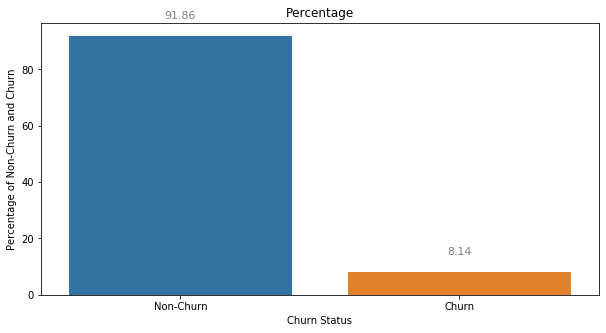

In [23]:
# Percentage of Churn and No-Churn
showBarplot("churn", 
            "churn", 
            data, 
            lambda x: len(x)*100/float(len(data)), 
            "Percentage", 
            "Churn Status",
            "Percentage of Non-Churn and Churn",
            ["Non-Churn", "Churn"],
            [10,5])

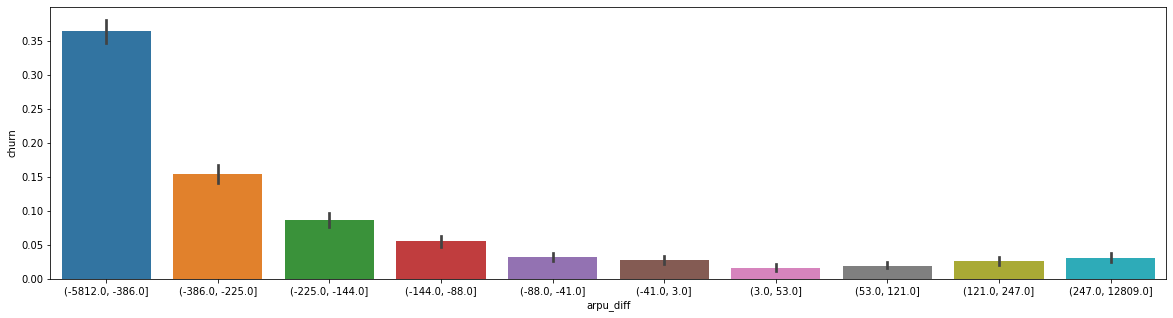

In [24]:
data['arpu_diff'] = pd.qcut(data['arpu_diff'], q=10, precision=0)
snsplot('arpu_diff', [20,5])
data.drop(['arpu_diff'], inplace=True, axis=1)

#### Bivariate analysis

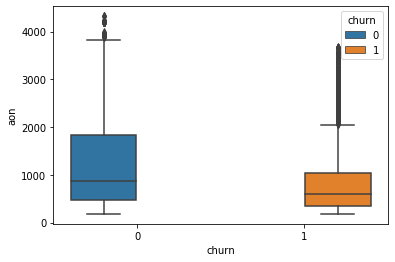

In [25]:
boxplot("churn", "aon", "True")

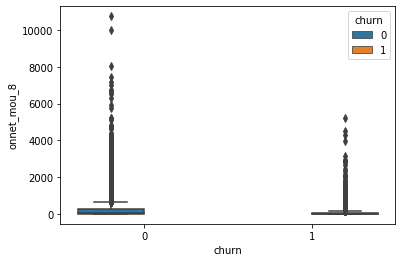

In [26]:
boxplot("churn", "onnet_mou_8", "True")

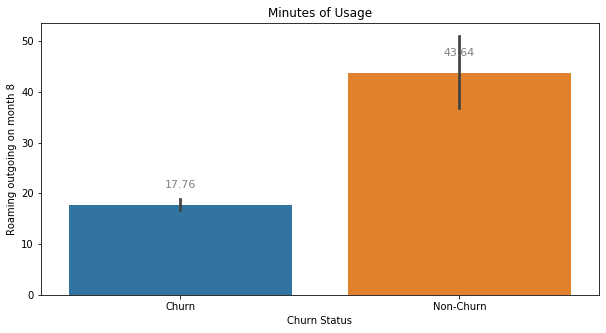

In [27]:
showBarplot("churn", "roam_og_mou_8", data, None, "Minutes of Usage", "Churn Status", "Roaming outgoing on month 8", ["Churn", "Non-Churn"], [10,5])

43.64 MoU of roaming outgoing for month 8 has churned compared to 17.76 MoU which didn't churned

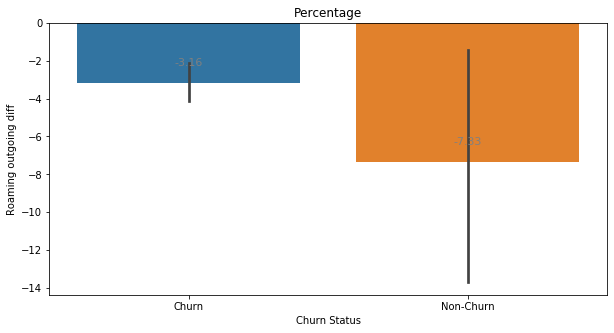

In [28]:
showBarplot("churn", "roam_og_mou_diff", data, None, "Percentage", "Churn Status", "Roaming outgoing diff", ["Churn", "Non-Churn"], [10,5])

The churn of users using roaming outgoing is less

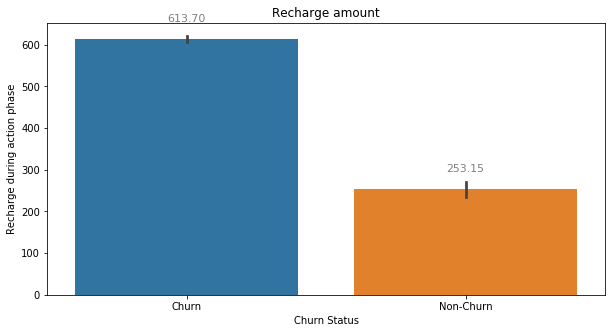

In [29]:
showBarplot("churn", "total_rech_amt_8", data, None, "Recharge amount", "Churn Status", "Recharge during action phase", ["Churn", "Non-Churn"], [10,5])

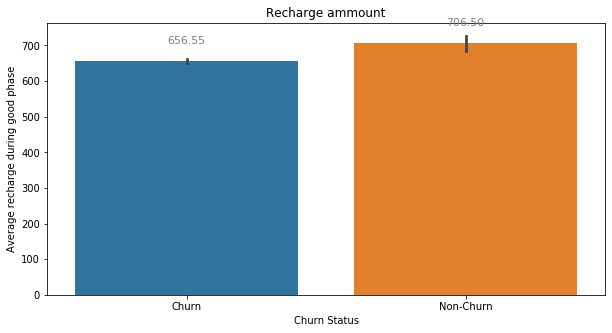

In [30]:
showBarplot("churn", "total_rech_amt_avg", data, None, "Recharge ammount", "Churn Status", "Average recharge during good phase", ["Churn", "Non-Churn"], [10,5])

The recharge amount has gone down in the 8th month as compared to the average amount from the good phase

## 6. Model building

Splitting into train and test datasets

In [31]:
from sklearn.model_selection import train_test_split

data_pca = data.copy()

y = data_pca.pop('churn')
X = data_pca

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

In [32]:
# Verifying that stratifying os working correctly
print("Churn % in Train Data = ", (round(100 * y_train.sum()/ len(y_train.index), 2)))
print("Churn % in Test Data = ", (round(100 * y_test.sum()/ len(y_test.index), 2)))

Churn % in Train Data =  8.13
Churn % in Test Data =  8.14


Using SMOTE to handle the data imbalance

In [33]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2)

print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0))) 

X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel()) 

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0))) 

Before OverSampling, counts of label '1': 1635
Before OverSampling, counts of label '0': 18465 

After OverSampling, the shape of train_X: (36930, 191)
After OverSampling, the shape of train_y: (36930,) 

After OverSampling, counts of label '1': 18465
After OverSampling, counts of label '0': 18465


Scaling the numeric variables

In [34]:
from sklearn.preprocessing import MinMaxScaler

columns = X_train.columns
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)

### Using PCA for high performance model

In [35]:
from sklearn.decomposition import PCA

pca = PCA(random_state=42)
pca.fit_transform(X_train)

array([[-8.81386794e-01,  3.72673625e-02,  3.16768466e-02, ...,
        -7.72852037e-18,  7.60471027e-17,  1.04783756e-15],
       [ 8.54641486e-01,  7.55896774e-02,  3.79944627e-02, ...,
        -6.04217603e-16,  4.45627868e-17, -2.27014911e-16],
       [ 8.57728986e-01,  2.10631220e-02,  1.88222200e-02, ...,
         1.24792293e-16, -1.25225927e-16,  1.90690573e-17],
       ...,
       [ 8.51119205e-01,  3.42267168e-02,  1.78392764e-02, ...,
         3.48724472e-17, -1.72567002e-18, -1.58424638e-17],
       [-8.94823798e-01,  9.36314508e-03, -2.52174894e-02, ...,
        -5.61410458e-18,  1.24128271e-18, -1.26175726e-17],
       [-8.94227671e-01,  2.73444366e-02,  1.07850458e-02, ...,
         1.57832882e-17, -8.02869714e-18, -1.38336604e-18]])

#### PCA Hyperparameter tuning

Find the cumulative sum of the explained variance ratio

In [36]:
cumulative_sum_of_variance = np.cumsum(pca.explained_variance_ratio_)

Plot the cumulative sum of the explained variance ratio vs number of features

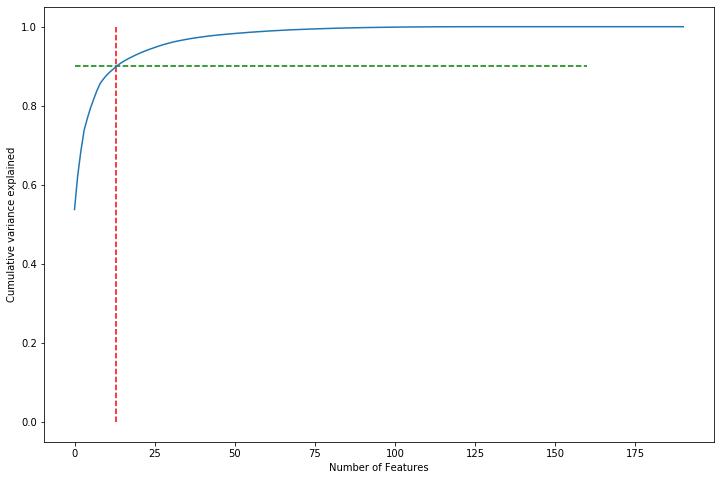

In [37]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=13, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.90, xmax=160, xmin=0, colors="g", linestyles="--")
plt.plot(cumulative_sum_of_variance)
plt.ylabel("Cumulative variance explained")
plt.xlabel("Number of Features")
plt.show()

Perform PCA with just 13 components

In [38]:
from sklearn.decomposition import IncrementalPCA

pca_final = IncrementalPCA(n_components=13)
X_train_pca = pca_final.fit_transform(X_train)
X_train_pca.shape

(20100, 13)

Checking the correlation of the resulting features using a corelation matrix

In [39]:
correlation_matrix = np.corrcoef(X_train_pca.transpose())
correlation_matrix.shape

(13, 13)

Plot a heatmap to visualize the corelations

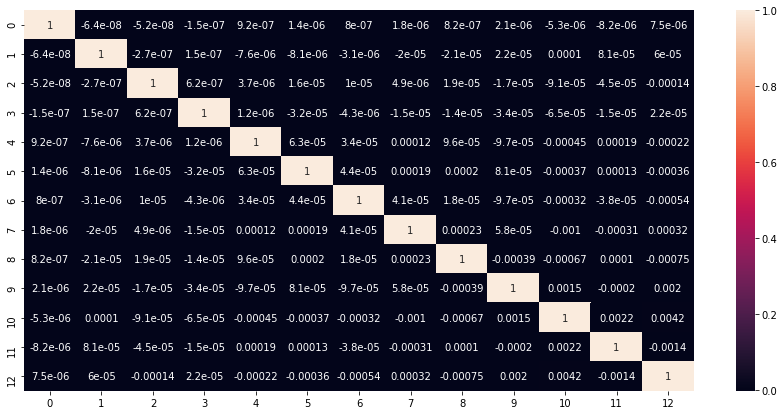

In [40]:
plt.figure(figsize=[15,7])
sns.heatmap(correlation_matrix, annot=True)
plt.show()

The heatmap looks good so now let see what happens with the test data

In [41]:
X_test = scaler.transform(X_test)

X_test_pca = pca_final.transform(X_test)
X_test_pca.shape

(9901, 13)

#### Logistic Regression using PCA

In [42]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

regression_pca = LogisticRegression()
model_pca = regression_pca.fit(X_train_pca, y_train)
pred_probs_test = model_pca.predict_proba(X_test_pca)

"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test[:,1]))

'0.84'

#### Random Forests using PCA

In [43]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()
rfc.fit(X_train_pca,y_train)

RandomForestClassifier()

Getting the predictions from the classifier

In [44]:
y_test_predict_pca = rfc.predict(X_test_pca)

Checking the metrics of our model

In [45]:
print(classification_report(y_test,y_test_predict_pca))
print(confusion_matrix(y_test,y_test_predict_pca))
print(accuracy_score(y_test,y_test_predict_pca))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      9095
           1       0.59      0.20      0.30       806

    accuracy                           0.92      9901
   macro avg       0.76      0.59      0.63      9901
weighted avg       0.91      0.92      0.91      9901

[[8986  109]
 [ 647  159]]
0.9236440763559236


##### Random forest hyperparameter tuning

In [46]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4, 8 ,10],
    'min_samples_leaf': range(50, 450, 200),
    'min_samples_split': range(100, 500, 100),
    'n_estimators': [100, 200, 300],
    'max_features': [ 10 ,20,40]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

# The following 2 lines take 40+ minutes to execute
# Comment to get the best score from Grid Search
#grid_search.fit(X_train_pca, y_train)
#print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

Using the tuned parameters to create our final model

In [47]:
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=8,
                             min_samples_leaf=50, 
                             min_samples_split=100,
                             max_features=10,
                             n_estimators=300)

rfc.fit(X_train_pca,y_train)

RandomForestClassifier(max_depth=8, max_features=10, min_samples_leaf=50,
                       min_samples_split=100, n_estimators=300)

In [48]:
y_test_predict_pca = rfc.predict(X_test_pca)
print(confusion_matrix(y_test,y_test_predict_pca))

[[9013   82]
 [ 681  125]]


### Without PCA for interpretable model

#### Logistic Regression

In [49]:
import statsmodels.api as sm

# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                20100
Model:                            GLM   Df Residuals:                    19953
Model Family:                Binomial   Df Model:                          146
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3459.5
Date:                Mon, 22 Feb 2021   Deviance:                       6919.0
Time:                        23:25:21   Pearson chi2:                 1.71e+07
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       7235.6585   9308.328      0.777      0.437    -1.1e+04    2.55e+04
x1           219.9318    274.549      0.801      0.423    -318.174     758.038
x2           226.0051    291.308      0.776      0.438    -344.949     796.959
x3             2.1221      6.035      0.352      0.725      -9.706      13.950
x4            -6.6673     34.192     -0.195      0.845     -73.683      60.348
x5            14.1673     34.503      0.411      0.681     -53.458      81.792
x6           -34.6810     66.061     -0.525      0.600    -164.159      94.797
x7            -6.1968     38.145     -0.162      0.871     -80.960      68.566
x8            13.6606     40.157      0.340      0.734     -65.045      92.366
x9           -54.3105     85.060     -0.638      0.523    -221.025     112.404
x10          284.0431    363.051      0.782      0.434    -427.524     995.610
x11          467.4067    599.861      0.779      0.436    -708.299    1643.113
x12        -1086.3479   1395.368     -0.779      0.436   -3821.219    1648.523
x13          143.7662    181.547      0.792      0.428    -212.059     499.592
x14          182.7912    235.466      0.776      0.438    -278.713     644.295
x15        -1106.6617   1434.972     -0.771      0.441   -3919.156    1705.832
x16         3.111e+04   3.87e+04      0.804      0.422   -4.48e+04    1.07e+05
x17         4.971e+04   4.39e+04      1.133      0.257   -3.63e+04    1.36e+05
x18         2.671e+05   7.58e+04      3.524      0.000    1.19e+05    4.16e+05
x19         2.288e+04   2.85e+04      0.804      0.422   -3.29e+04    7.87e+04
x20         3.093e+04   2.73e+04      1.133      0.257   -2.26e+04    8.44e+04
x21          8.81e+04    2.5e+04      3.524      0.000    3.91e+04    1.37e+05
x22         7087.0537   8824.186      0.803      0.422   -1.02e+04    2.44e+04
x23         8302.8403   7326.745      1.133      0.257   -6057.316    2.27e+04
x24         1.339e+04   3799.580      3.525      0.000    5945.301    2.08e+04
x25           -3.8099      1.271     -2.998      0.003      -6.300      -1.319
x26            1.4872      1.888      0.788      0.431      -2.213       5.187
x27            1.1219      2.314      0.485      0.628      -3.413       5.657
x28        -1.838e+04   3.64e+04     -0.505      0.614   -8.97e+04     5.3e+04
x29         -8.45e+04   6.01e+04     -1.407      0.159   -2.02e+05    3.32e+04
x30         2.784e+04   6.43e+04      0.433      0.665   -9.81e+04    1.54e+05
x31          6.48e+04   5.43e+04      1.192      0.233   -4.17e+04    1.71e+05
x32         -1.18e+05   6.02e+04     -1.959      0.050   -2.36e+05      72.128
x33         1.551e+05   7.34e+04      2.111      0.035    1.11e+04    2.99e+05
x34         7.314e+04   6.13e+04      1.192      0.233   -4.71e+04    1.93e+05
x35        -1.373e+05   7.01e+04     -1.959      0.050   -2.75e+05      89.317
x3

Feature selection using RFE

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

logreg = LogisticRegression()
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

rfe.support_

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False,  True, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False,  True,  True, False, False, False, False, False,
       False, False,  True, False, False,  True, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [51]:
# Convert X_train to a DataFrame from a numpy.array
X_train = pd.DataFrame(X_train, columns=columns)
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('arpu_6', False, 13),
 ('arpu_7', False, 47),
 ('arpu_8', False, 8),
 ('onnet_mou_6', False, 119),
 ('onnet_mou_7', False, 138),
 ('onnet_mou_8', False, 26),
 ('offnet_mou_6', False, 168),
 ('offnet_mou_7', False, 120),
 ('offnet_mou_8', False, 20),
 ('roam_ic_mou_6', False, 38),
 ('roam_ic_mou_7', False, 44),
 ('roam_ic_mou_8', False, 130),
 ('roam_og_mou_6', False, 122),
 ('roam_og_mou_7', False, 3),
 ('roam_og_mou_8', False, 53),
 ('loc_og_t2t_mou_6', False, 142),
 ('loc_og_t2t_mou_7', False, 177),
 ('loc_og_t2t_mou_8', False, 45),
 ('loc_og_t2m_mou_6', False, 42),
 ('loc_og_t2m_mou_7', False, 65),
 ('loc_og_t2m_mou_8', True, 1),
 ('loc_og_t2f_mou_6', False, 173),
 ('loc_og_t2f_mou_7', False, 160),
 ('loc_og_t2f_mou_8', False, 25),
 ('loc_og_t2c_mou_6', False, 39),
 ('loc_og_t2c_mou_7', False, 68),
 ('loc_og_t2c_mou_8', False, 153),
 ('loc_og_mou_6', False, 116),
 ('loc_og_mou_7', False, 97),
 ('loc_og_mou_8', False, 9),
 ('std_og_t2t_mou_6', False, 121),
 ('std_og_t2t_mou_7', Fal

In [52]:
col = X_train.columns[rfe.support_]

In [53]:
# Pick the columns that were returned after RFE
X_train.columns[~rfe.support_]

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6',
       ...
       'total_rech_amt_avg', 'total_rech_amt_diff', 'total_rech_data_avg',
       'total_rech_data_diff', 'total_rech_amt_data_avg',
       'total_rech_amt_data_diff', 'vol_2g_mb_avg', 'vol_2g_mb_diff',
       'vol_3g_mb_avg', 'vol_3g_mb_diff'],
      dtype='object', length=176)

Assessing the model with stats model

In [54]:
X_train_sm = sm.add_constant(X_train[col])
y_train = y_train.values.reshape(-1,1)

logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                20100
Model:                            GLM   Df Residuals:                    20084
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3845.9
Date:                Mon, 22 Feb 2021   Deviance:                       7691.7
Time:                        23:26:03   Pearson chi2:                 1.55e+07
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  11.1250      1.001     11.114      0.000       9.163      13.087
loc_og_t2m_mou_8       -7.7434      1.792     -4.322      0.000     -11.255      -4.232
total_og_mou_8         -7.3966      1.253     -5.905      0.000      -9.852      -4.942
loc_ic_t2m_mou_8       -6.7963      6.153     -1.105      0.269     -18.855       5.262
loc_ic_mou_8          -17.8894      5.933     -3.015      0.003     -29.518      -6.260
total_ic_mou_8        -11.4316      3.170     -3.607      0.000     -17.644      -5.219
total_rech_num_8       -9.2104      1.275     -7.225      0.000     -11.709      -6.712
total_rech_amt_6        8.6736      1.073      8.086      0.000       6.571      10.776
last_day_rch_amt_8    -14.2532      1.873     -7.609      0.000     -17.925     -10.582
total_rech_data_8     -28.0630      3.926     -7.147      0.000     -35.758     -20.368
count_rech_2g_8        11.7054      3.708      3.156      0.002       4.437      18.974
monthly_2g_8           -6.0585      0.827     -7.330      0.000      -7.678      -4.438
aug_vbc_3g            -10.6039      2.374     -4.467      0.000     -15.257      -5.951
total_og_mou_diff      -2.7396      1.333     -2.055      0.040      -5.353      -0.127
total_ic_mou_diff     -12.9075      1.411     -9.149      0.000     -15.673     -10.142
total_rech_num_diff    -5.5847      1.332     -4.193      0.000      -8.196      -2.974
=======================================================================================
"""

In [55]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

0    0.032871
1    0.000019
2    0.007909
3    0.054361
4    0.175898
5    0.026874
6    0.114409
7    0.011240
8    0.000181
9    0.004789
dtype: float64

In [56]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([3.28714237e-02, 1.93668843e-05, 7.90922385e-03, 5.43606384e-02,
       1.75898246e-01, 2.68744486e-02, 1.14409134e-01, 1.12399664e-02,
       1.80718597e-04, 4.78941484e-03])

Creating a dataframe with the actual churn flag and the predicted probabilities

In [57]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.tolist(), 'Churn_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.tolist()
y_train_pred_final.head()

,Churn,Churn_Prob,CustID
0,[0],0.032871,[0]
1,[0],0.000019,[0]
2,[0],0.007909,[0]
3,[0],0.054361,[0]
4,[0],0.175898,[0]


Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0



In [58]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head(10)

,Churn,Churn_Prob,CustID,predicted
0,[0],0.032871,[0],0
1,[0],0.000019,[0],0
2,[0],0.007909,[0],0
3,[0],0.054361,[0],0
4,[0],0.175898,[0],0
5,[0],0.026874,[0],0
6,[0],0.114409,[0],0
7,[0],0.011240,[0],0
8,[0],0.000181,[0],0
9,[0],0.004789,[0],0


## 7. Recommendations using interpretable model

The 15 most significant features are
* loc_og_t2m_mou_8
* total_og_mou_8
* loc_ic_t2m_mou_8
* loc_ic_mou_8
* total_ic_mou_8
* total_rech_num_8
* total_rech_amt_6
* last_day_rch_amt_8
* total_rech_data_8
* count_rech_2g_8
* monthly_2g_8
* aug_vbc_3g
* total_og_mou_diff
* total_ic_mou_diff
* total_rech_num_diff

From the most significant columns we can see that the data from the 8th month is the most significant predictor of churn

Accuracy score of the two models:

Random forests with PCA: 0.92
Logistic Regression with PCA: 0.84

Since correctly predicting true positives and true negatives are important Random forests with PCA has a better performance